In [1]:
# Učitavanje modula
import numpy as np
import matplotlib.pyplot as plt
from obspy import read, read_inventory, Stream, Trace, UTCDateTime

3 Trace(s) in Stream:
DN.DF01..HHE | 2022-04-22T21:07:48.900000Z - 2022-04-22T21:09:28.900000Z | 100.0 Hz, 10001 samples
DN.DF01..HHN | 2022-04-22T21:07:48.900000Z - 2022-04-22T21:09:28.900000Z | 100.0 Hz, 10001 samples
DN.DF01..HHZ | 2022-04-22T21:07:48.900000Z - 2022-04-22T21:09:28.900000Z | 100.0 Hz, 10001 samples


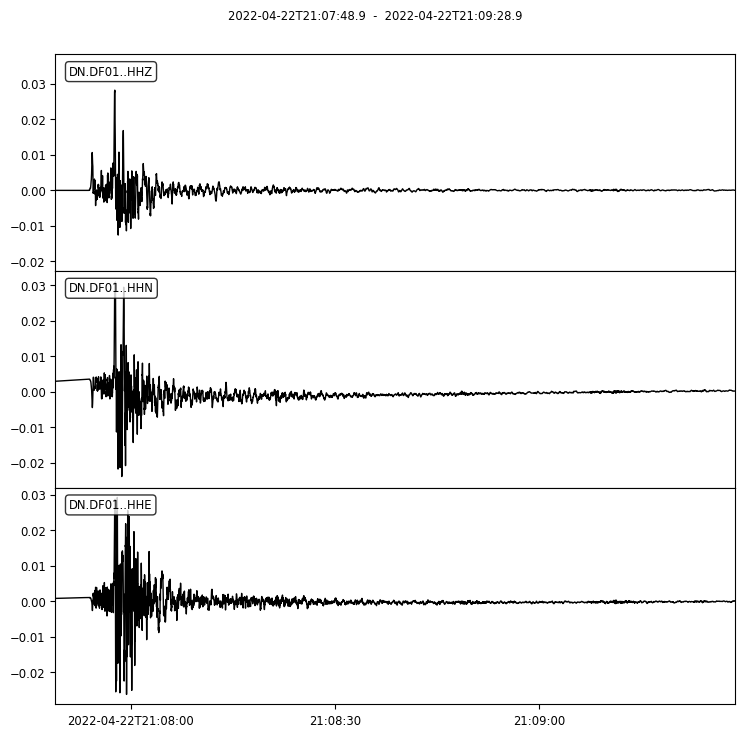

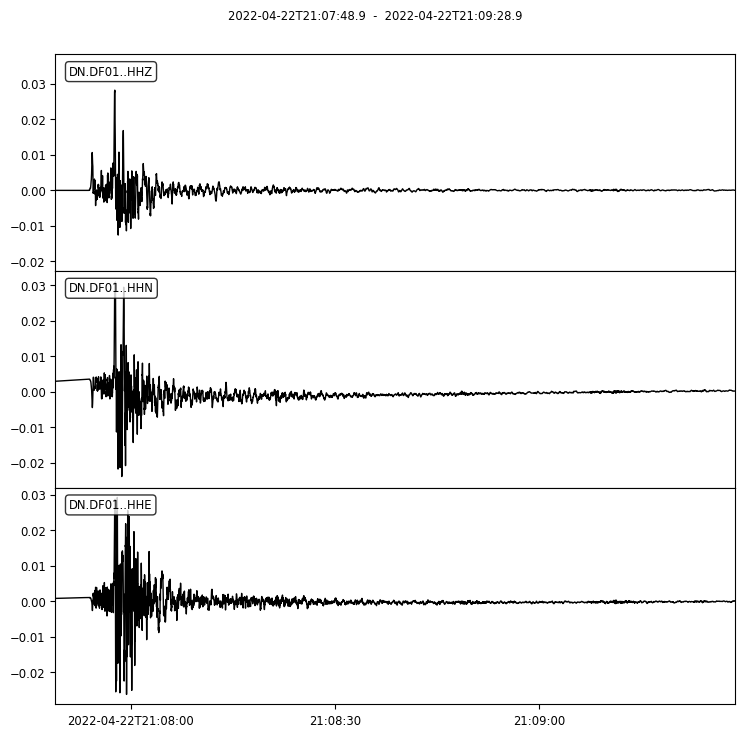

In [4]:
# Učitavanje i vizualizacija podataka
# example1: M 5.9, 2022-04-22T21:07:48.9, d = 21 km, Berkovići, BiH
# example2: M 1.7, 2023-01-21T21:19:01.2, d = 13 km, Sovići, BiH
# example3: M 5.5, 2022-10-31T21:42:50.2, d = 286 km, Južna Italija
# example4: M 7.0, 2022-11-22T02:03:07.6 , d = 10 km, Solomonski otoci
# example5: Bolid, 2020-02-28T09:33:50
# example6: Eksplozija, 2019-05-09T11:48:34.2
# example7: Icequake, 2010-09-07T22:13:35, Yahtse glacier, Aljaska

infile = 'example1.mseed'
st = read("./DATA/"+infile, format='MSEED')
print(st)
st.plot()

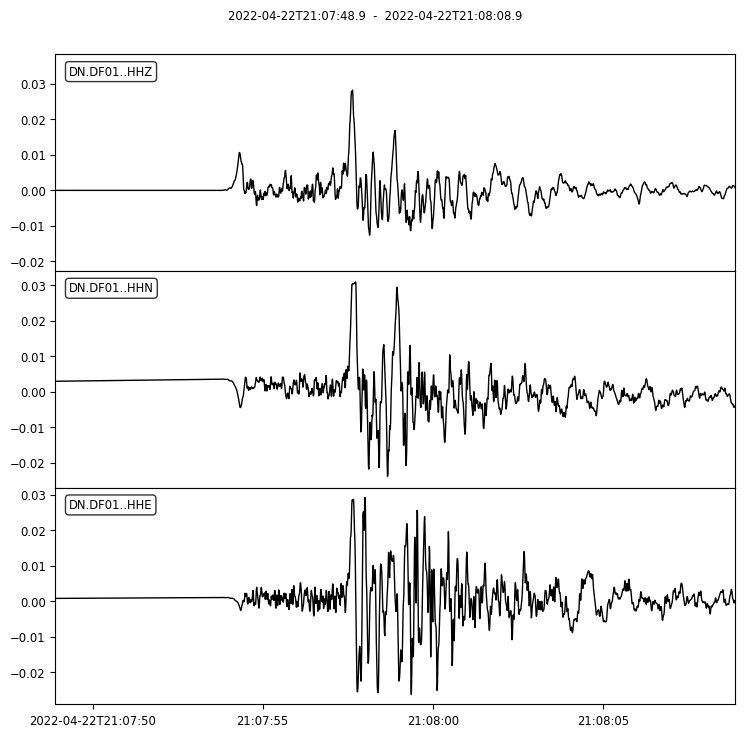

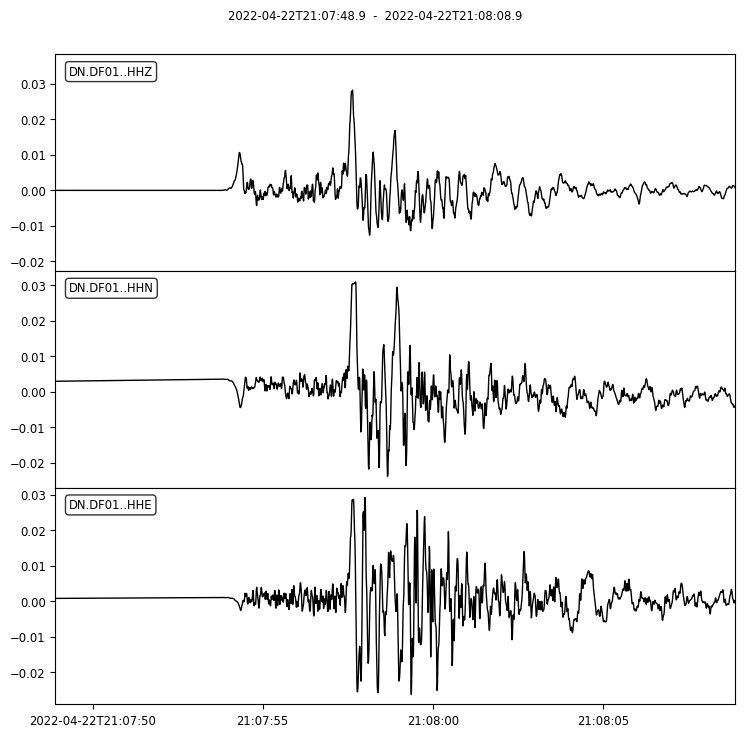

In [5]:
start = st[0].stats.starttime
dt = 20
st.trim(start, start+dt)
st.plot()

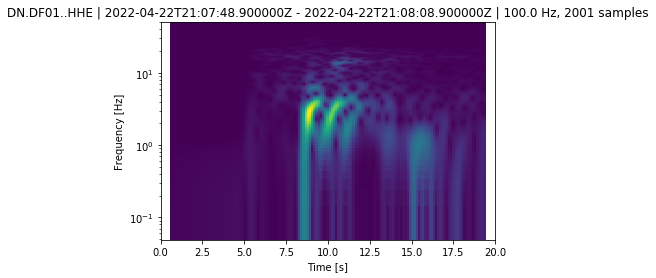

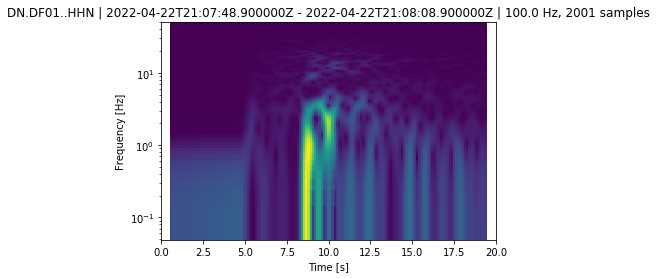

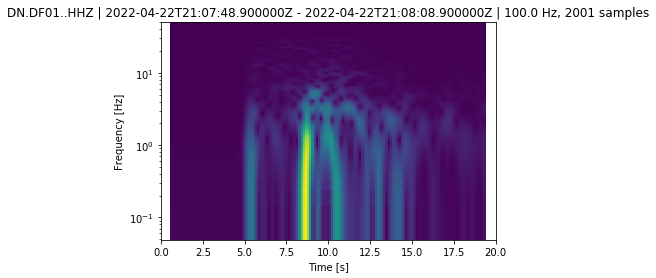

[None, None, None]

In [6]:
st.spectrogram(log=True)

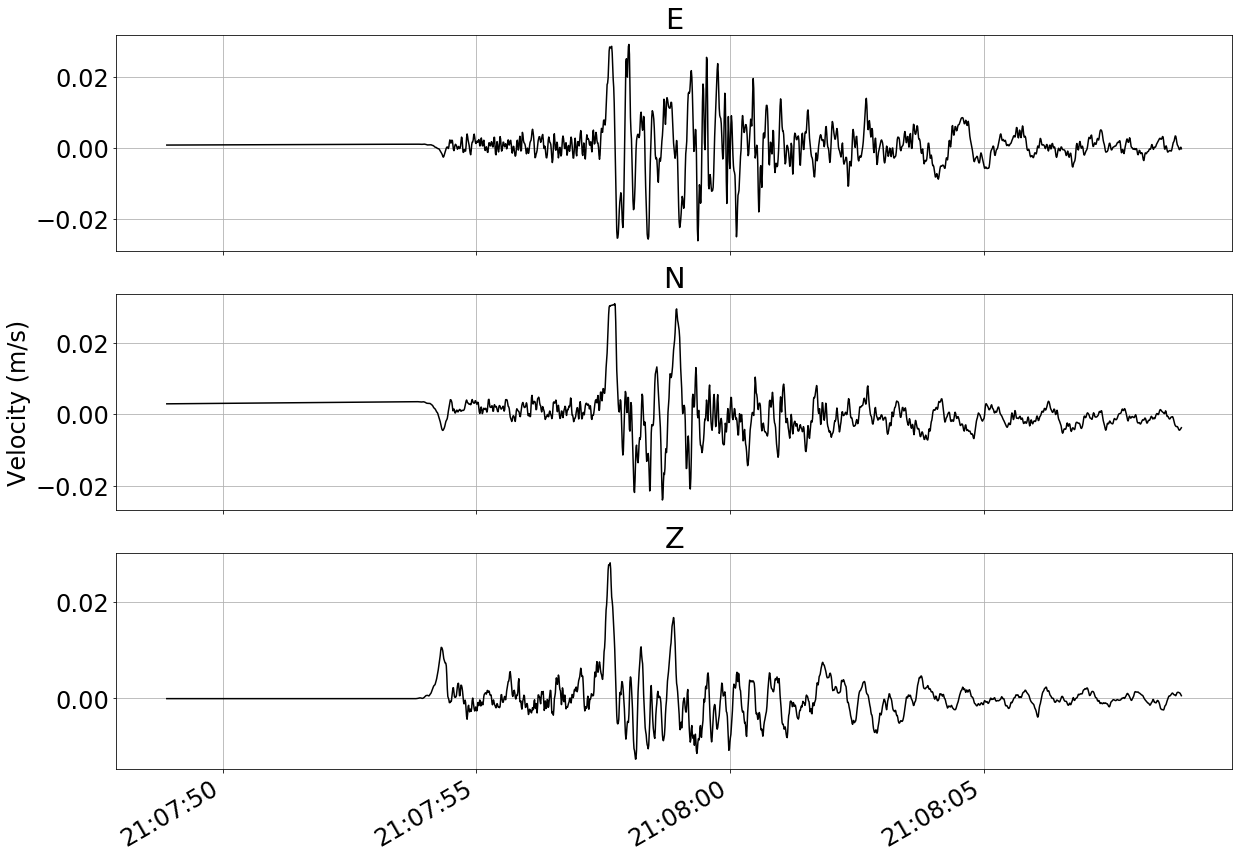

In [7]:
# Crtanje vremenskih nizova
fig = plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 24})
ax = fig.add_subplot(3, 1, 1)
ax.set_title('E')
ax.plot(st[0].times("matplotlib"), st[0].data, "k")
ax.xaxis_date()
fig.autofmt_xdate()
plt.grid()

ax = fig.add_subplot(3, 1, 2)
ax.set_title('N')
ax.plot(st[1].times("matplotlib"), st[1].data, "k")
ax.xaxis_date()
fig.autofmt_xdate()
plt.grid()
ax.set_ylabel('Velocity (m/s)')

ax = fig.add_subplot(3, 1, 3)
ax.set_title('Z')
ax.plot(st[2].times("matplotlib"), st[2].data, "k")
ax.xaxis_date()
fig.autofmt_xdate()
plt.grid()
plt.show()

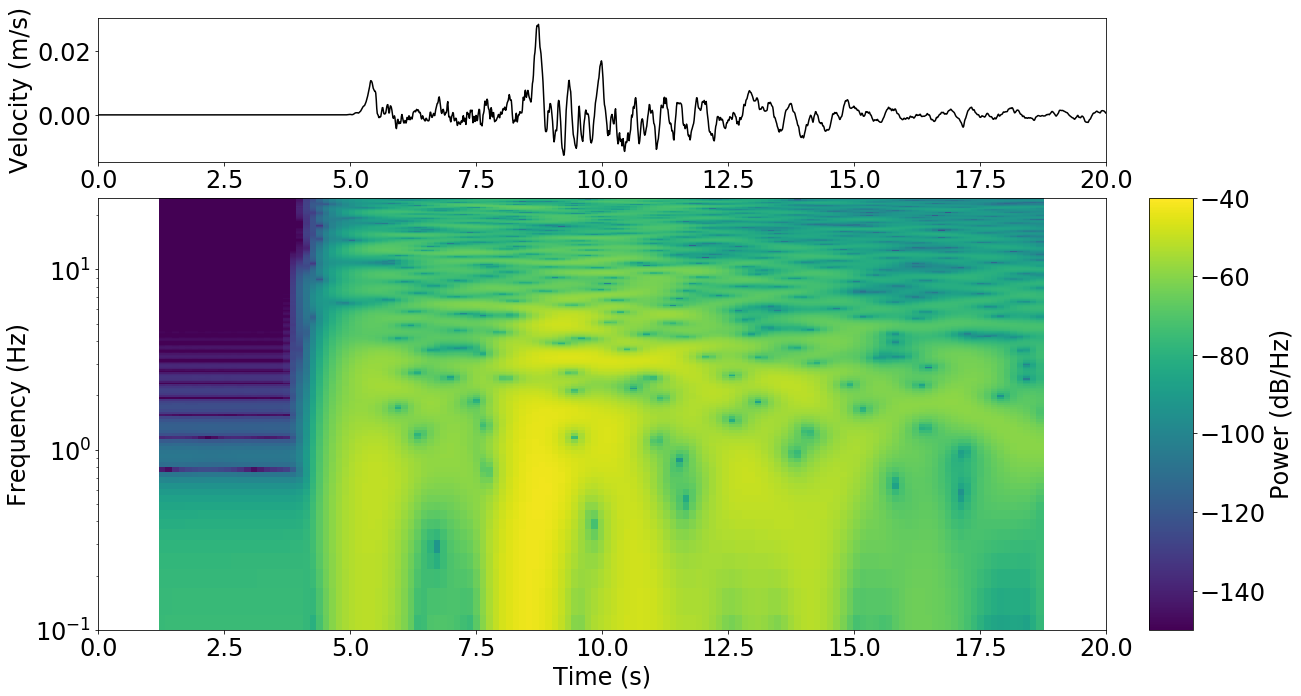

In [8]:
# Crtanje spektara vremenskih nizova
tr = st[2]
t = np.arange(tr.stats.npts) / tr.stats.sampling_rate
sps = int(st[0].stats.sampling_rate)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2])
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

ax1.plot(t, tr.copy().data, 'k')
ax1.set_ylabel('Velocity (m/s)')

tr.spectrogram(wlen=2*sps, per_lap=0.95, dbscale=True, log=True, axes=ax2)#, cmap='YlOrRd')
ax2.set_ylim((0.1,25))
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')

ax2.collections[0].set_clim(vmin=-150, vmax=-40) #example1
#ax2.collections[0].set_clim(vmin=-280, vmax=-160) #example2
#ax2.collections[0].set_clim(vmin=-220, vmax=-90) #example3
#ax2.collections[0].set_clim(vmin=-260, vmax=-90) #example4
#ax2.collections[0].set_clim(vmin=-230, vmax=-140) #example5
#ax2.collections[0].set_clim(vmin=-160, vmax=-105) #example7
#ax2.collections[0].set_clim(vmin=-180, vmax=-150) #example6
mappable = ax2.collections[0]
cb = plt.colorbar(mappable=mappable, cax=ax3, ticks=np.arange(-360,0,20))
cb.set_label('Power (dB/Hz)')

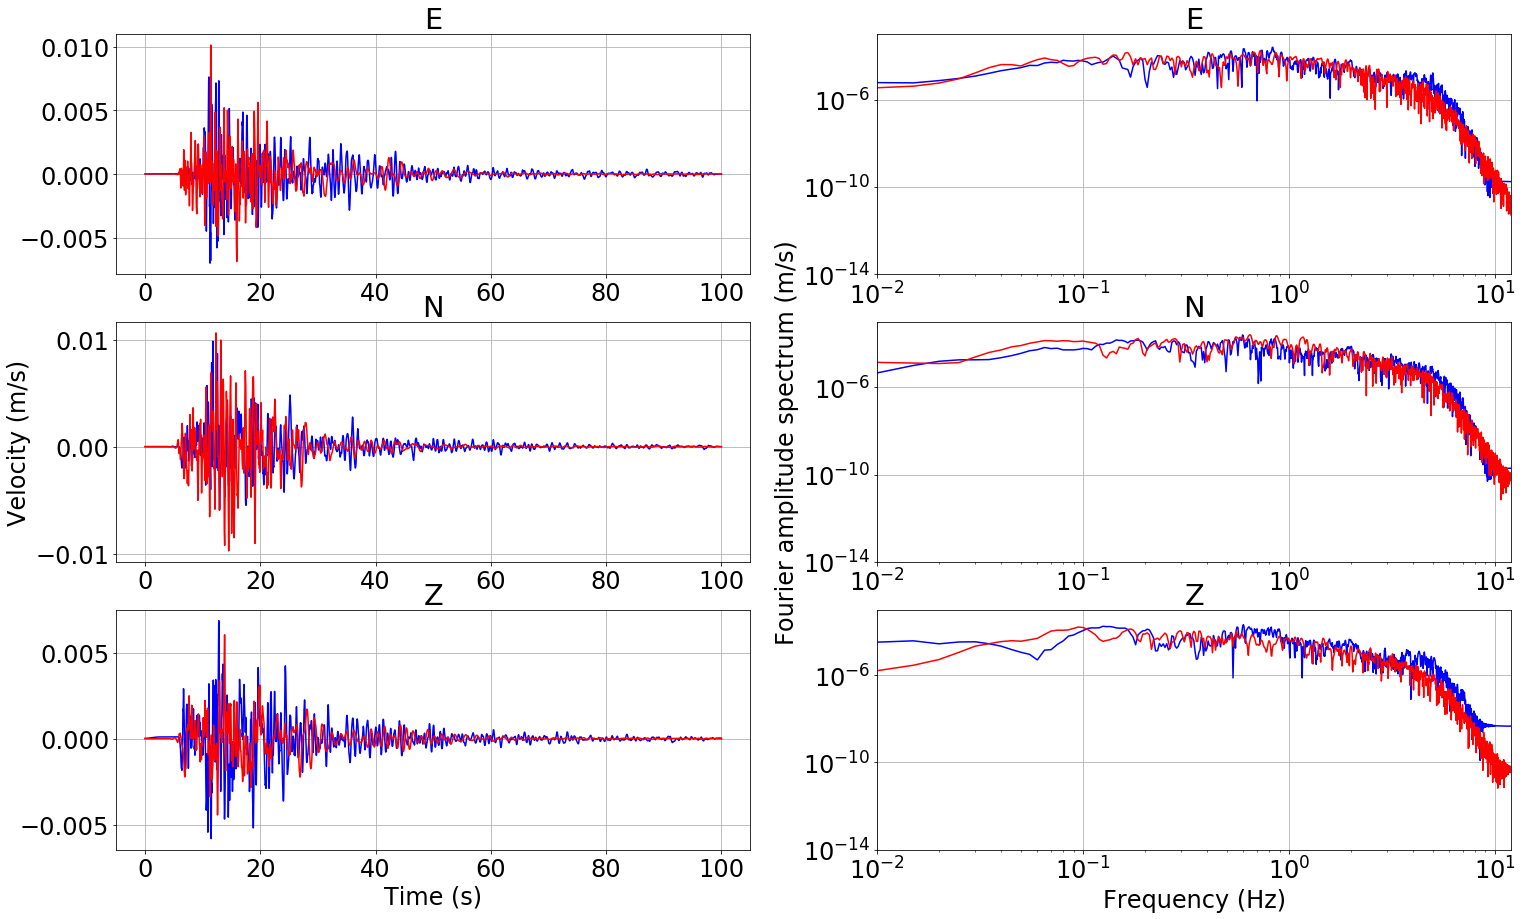

In [9]:
# Primjer zabilježenog i simuliranog seizmograma, ZG 2020, glavni potres M 5.3
st0 = read("./DATA/recorded.mseed", format='MSEED')
st1 = read("./DATA/simulated.mseed", format='MSEED')

t0 = np.arange(st0[0].stats.npts) / st0[0].stats.sampling_rate
t1 = np.arange(st1[0].stats.npts) / st1[0].stats.sampling_rate

dt0 = 1/st0[0].stats.sampling_rate
dt1 = 1/st1[0].stats.sampling_rate

Fz = np.fft.fft(st0[2].data, n=len(st0[2].data)); xz = np.linspace(0.0, 1.0/(2.0*dt0), len(st0[2].data))
Fn = np.fft.fft(st0[1].data, n=len(st0[1].data)); xn = np.linspace(0.0, 1.0/(2.0*dt0), len(st0[1].data))
Fe = np.fft.fft(st0[0].data, n=len(st0[0].data)); xe = np.linspace(0.0, 1.0/(2.0*dt0), len(st0[0].data))

Fsz = np.fft.fft(st1[2].data, n=len(st1[2].data)); xsz = np.linspace(0.0, 1.0/(2.0*dt1), len(st1[2].data))
Fsn = np.fft.fft(st1[1].data, n=len(st1[1].data)); xsn = np.linspace(0.0, 1.0/(2.0*dt1), len(st1[1].data))
Fse = np.fft.fft(st1[0].data, n=len(st1[0].data)); xse = np.linspace(0.0, 1.0/(2.0*dt1), len(st1[0].data))

fig = plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 24})
ax = fig.add_subplot(3, 2, 1)
ax.set_title('E')
ax.plot(t0, st0[0].data, "b")
ax.plot(t1, st1[0].data, "r")
plt.grid()

ax = fig.add_subplot(3, 2, 2)
ax.set_title('E')
ax.loglog(xe, 2.0/len(st0[0].data) * np.abs(Fe),'b')
ax.loglog(xse, 2.0/len(st1[0].data) * np.abs(Fse),'r')
ax.set_xlim(0.01,12)
ax.set_ylim(pow(10,-14),pow(10,-3))
plt.grid()

ax = fig.add_subplot(3, 2, 3)
ax.set_title('N')
ax.plot(t0, st0[1].data, "b")
ax.plot(t1, st1[1].data, "r")
plt.grid()
ax.set_ylabel('Velocity (m/s)')

ax = fig.add_subplot(3, 2, 4)
ax.set_title('N')
ax.loglog(xn, 2.0/len(st0[1].data) * np.abs(Fn),'b')
ax.loglog(xsn, 2.0/len(st1[1].data) * np.abs(Fsn),'r')
ax.set_xlim(0.01,12)
ax.set_ylim(pow(10,-14),pow(10,-3))
plt.grid()
ax.set_ylabel('Fourier amplitude spectrum (m/s)')

ax = fig.add_subplot(3, 2, 5)
ax.set_title('Z')
ax.plot(t0, st0[2].data, "b")
ax.plot(t1, st1[2].data, "r")
plt.grid()
ax.set_xlabel('Time (s)')

ax = fig.add_subplot(3, 2, 6)
ax.set_title('Z')
ax.loglog(xz, 2.0/len(st0[2].data) * np.abs(Fz),'b')
ax.loglog(xsz, 2.0/len(st1[2].data) * np.abs(Fsz),'r')
ax.set_xlim(0.01,12)
ax.set_ylim(pow(10,-14),pow(10,-3))
plt.grid()
ax.set_xlabel('Frequency (Hz)')
plt.show()